# Importing required python modules:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
from pysolar.solar import *
import datetime, pytz
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import folium
import folium.plugins as plugins # The Folium Javascript Map Library
%matplotlib inline

# Exploratory Data Analysis (EDA):

In [13]:
d_wssolschlmrks=pd.read_csv('data_with_WSigLmrkSol.csv')
d_wssolschlmrks.head()

Unnamed: 0                 Time                 Date  year  month  day  \
0           0  2017-11-17 14:00:00  2017-11-17 00:00:00  2017     11   17   
1           1  2017-11-17 14:00:00  2017-11-17 00:00:00  2017     11   17   
2           2  2018-06-13 00:00:00  2018-06-13 00:00:00  2018      6   13   
3           3  2018-06-13 19:00:00  2018-06-13 00:00:00  2018      6   13   
4           4  2018-06-13 22:00:00  2018-06-13 00:00:00  2018      6   13   

   hour  DayOfWeek  DayOfYear Holiday  ...  humidity  windSpeed Signals  \
0    14          4        321       0  ...      0.61       6.35      64   
1    14          4        321       0  ...      0.61       6.35      64   
2     0          2        164       0  ...      0.78       5.89      64   
3    19          2        164       0  ...      0.39       6.40      64   
4    22          2        164       0  ...      0.52       8.21      64   

  Schools  Landmarks  Solar_inclination  temperature  dewPoint  \
0      31          2          34.696357        81.96     67.03   
1      31          2          34.696551        81.96     67.03   
2      31          2         -32.236190        78.17     70.85   
3      31          2          17.941989        90.94     62.30   
4      31          2         -16.301790        84.30     64.74   

   Issue Reported  Accident  
0    Crash Urgent         1  
1   Crash Service         1  
2    Crash Urgent         1  
3    Crash Urgent         1  
4    Crash Urgent         1  

[5 rows x 26 columns]

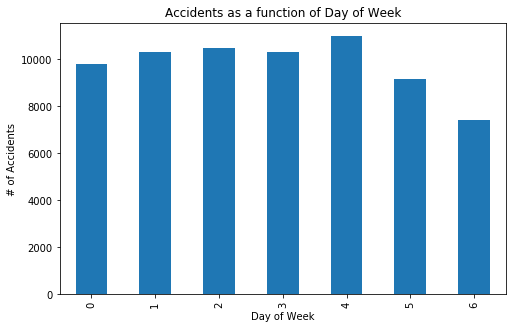

In [4]:
d_wssolschlmrks.groupby('DayOfWeek').sum()['Accident'].plot('bar', figsize=(8,5))
plt.xlabel('Day of Week')
plt.ylabel('# of Accidents')
plt.title('Accidents as a function of Day of Week')
plt.savefig('Accident_DayOfWeek.pdf', bbox_inches='tight')

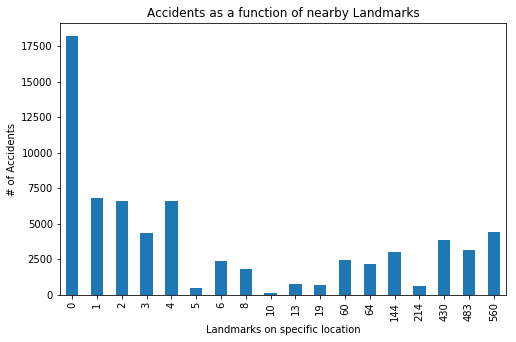

In [5]:
d_wssolschlmrks.groupby('Landmarks').sum()['Accident'].plot('bar', figsize=(8,5))
plt.xlabel('Landmarks on specific location')
plt.ylabel('# of Accidents')
plt.title('Accidents as a function of nearby Landmarks')
plt.savefig('Accident_Landmarks.pdf', bbox_inches='tight')

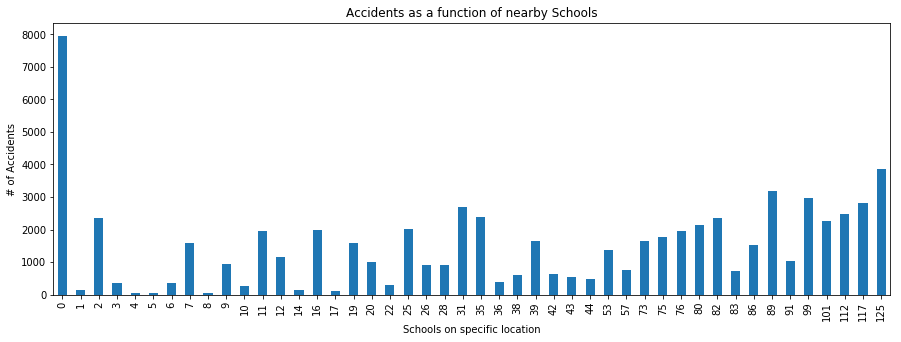

In [6]:
d_wssolschlmrks.groupby('Schools').sum()['Accident'].plot('bar', figsize=(15,5))
plt.xlabel('Schools on specific location')
plt.ylabel('# of Accidents')
plt.title('Accidents as a function of nearby Schools')
plt.savefig('Accident_Schools.pdf', bbox_inches='tight')

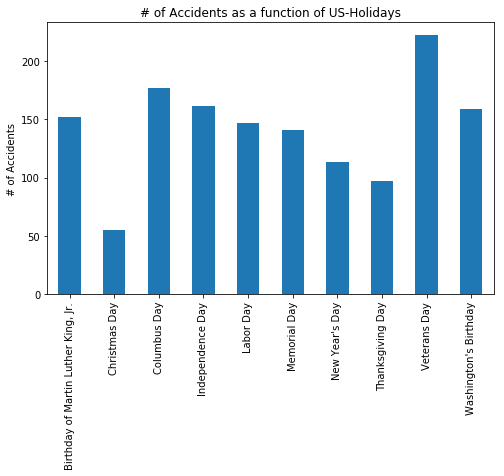

In [7]:
d_wssolschlmrks.groupby('Holiday').sum()['Accident'].drop('0').plot('bar', figsize=(8, 5))
plt.xlabel('')
plt.ylabel('# of Accidents')
plt.title('# of Accidents as a function of US-Holidays')
plt.savefig('Accident_Holiday.pdf', bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


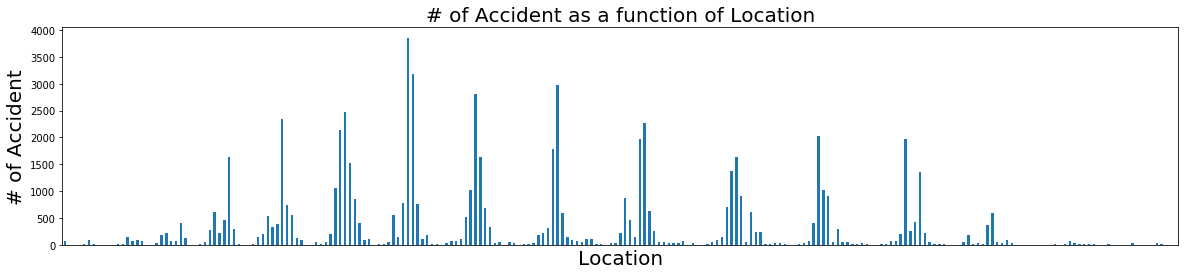

In [8]:
fig, ax=plt.subplots(1)
d_wssolschlmrks.groupby(['Location']).count()['Accident'].plot('bar', figsize=(20, 4))
plt.ylabel('# of Accident', fontsize=20)
plt.xlabel('Location', fontsize=20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
#ax.set_yticklabels([])
plt.title('# of Accident as a function of Location', fontsize=20)
plt.savefig('Accident_location.pdf', bbox_inches='tight')

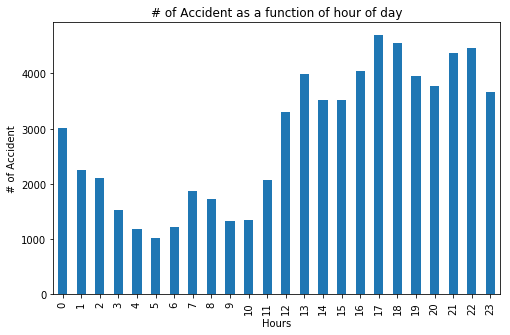

In [9]:
d_wssolschlmrks.groupby('hour').sum()['Accident'].plot('bar', figsize=(8,5))
plt.xlabel('Hours')
plt.ylabel('# of Accident')
plt.title('# of Accident as a function of hour of day')
plt.savefig('Accident_hourly.pdf', bbox_inches='tight')

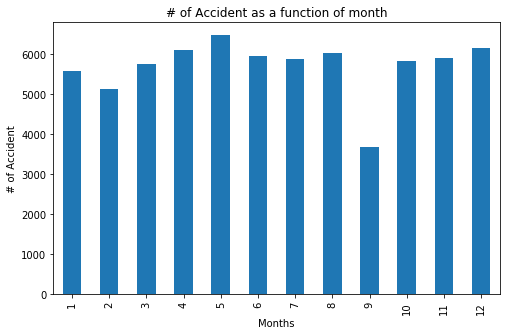

In [10]:
d_wssolschlmrks.groupby('month').sum()['Accident'].plot('bar', figsize=(8,5))
plt.xlabel('Months')
plt.ylabel('# of Accident')
plt.title('# of Accident as a function of month')
plt.savefig('Accident_monthly.pdf', bbox_inches='tight')

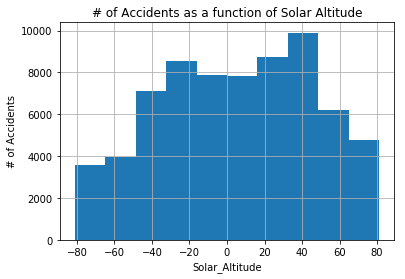

In [11]:

d_wssolschlmrks.hist('Solar_inclination', bins=10)
plt.xlabel('Solar_Altitude')
plt.ylabel('# of Accidents')
plt.title('# of Accidents as a function of Solar Altitude')
plt.savefig('Accident_Solar_inclination.pdf', bbox_inches='tight')

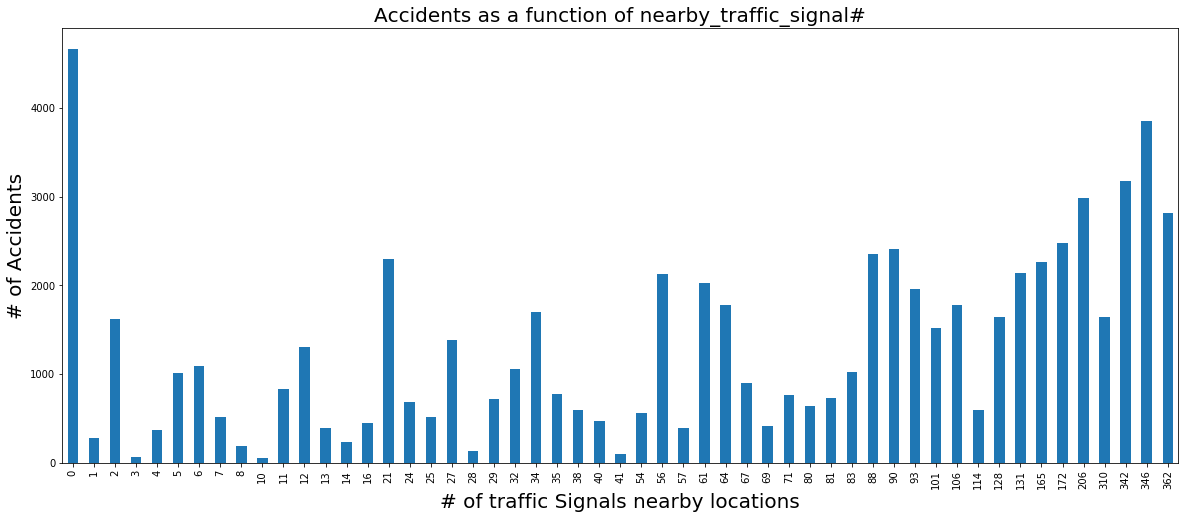

In [14]:
d_wssolschlmrks.groupby('Signals').sum()['Accident'].plot('bar', figsize=(20, 8))
plt.xlabel('# of traffic Signals nearby locations', fontsize=20)
plt.ylabel('# of Accidents', fontsize=20)
plt.title('Accidents as a function of nearby_traffic_signal#', fontsize=20)
plt.savefig('Accident_TrafficSignal.pdf', bbox_inches='tight')

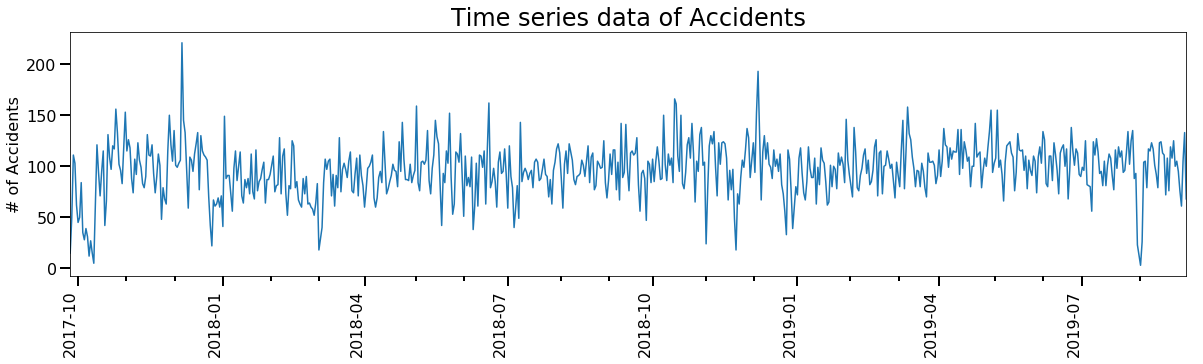

In [15]:
d_wssolschlmrks['Date']= pd.to_datetime(d_wssolschlmrks['Date']).dt.normalize()
ax=d_wssolschlmrks.groupby('Date').sum()['Accident'].plot(figsize=(20, 5),rot=90, fontsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('')
plt.ylabel('# of Accidents', fontsize=16)
plt.title('Time series data of Accidents', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Time_series_accident.pdf', bbox_inches='tight')

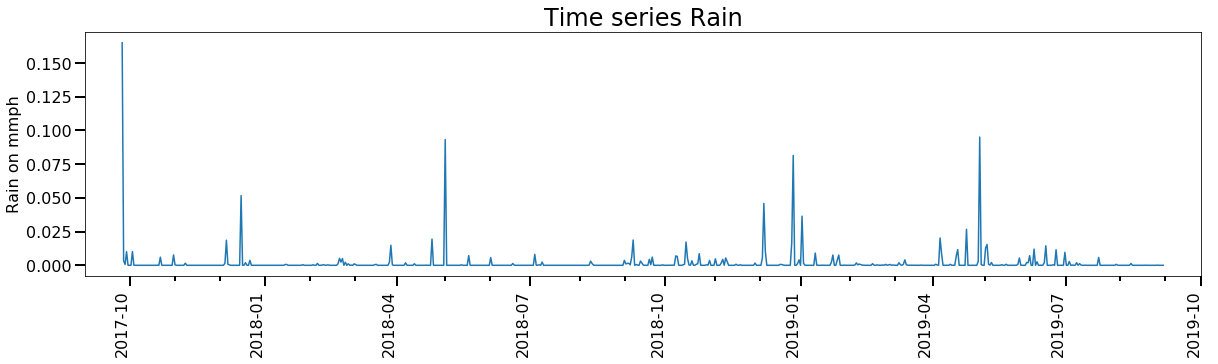

In [16]:
d_wssolschlmrks['Date']= pd.to_datetime(d_wssolschlmrks['Date']).dt.normalize()
ax=d_wssolschlmrks.groupby('Date').mean()['pcpt_mmph'].plot(figsize=(20, 5),rot=90, fontsize=16)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('')
plt.ylabel('Rain on mmph', fontsize=16)
plt.xlim('2017-09-01', '2019-10-01')
plt.title('Time series Rain', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Time_series_Rain.pdf', bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


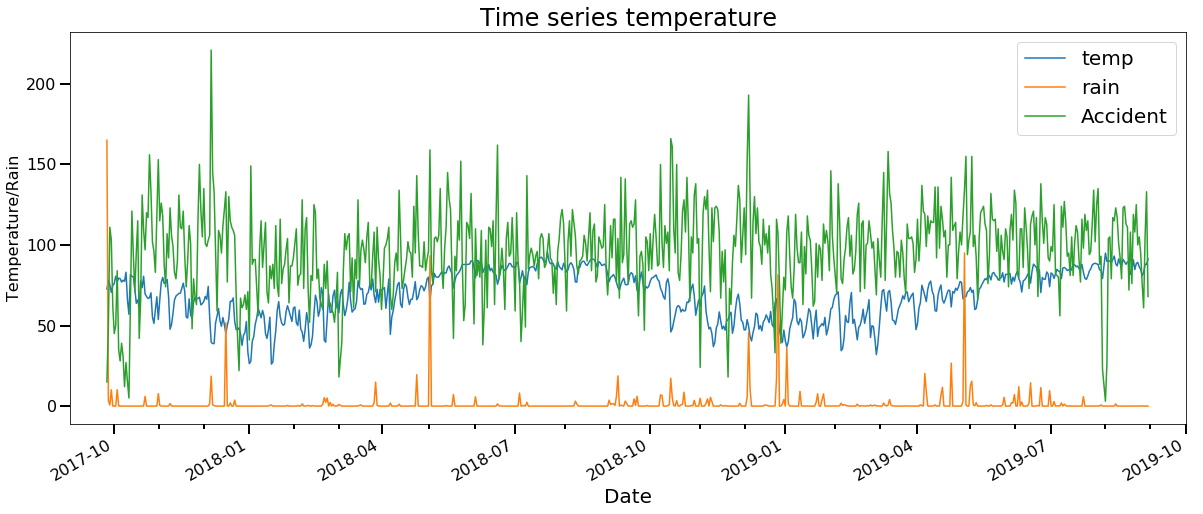

In [17]:
d_wssolschlmrks['raining']=d_wssolschlmrks['pcpt_mmph']*1000
d_wssolschlmrks['Date']= pd.to_datetime(d_wssolschlmrks['Date']).dt.normalize()
ax=d_wssolschlmrks.groupby('Date').mean()['temperature'].plot(figsize=(20, 8),rot=30, fontsize=16, label='temp')
ax= d_wssolschlmrks.groupby('Date').mean()['raining'].plot(figsize=(20, 8),rot=30, fontsize=16, label='rain')
ax=d_wssolschlmrks.groupby('Date').sum()['Accident'].plot(figsize=(20, 8),rot=30, fontsize=16, label ='Accident')
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature/Rain', fontsize=16)
plt.legend(fontsize=20)
plt.xlim('2017-09-01', '2019-10-01')
plt.title('Time series temperature', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Time_series_temp.pdf', bbox_inches='tight')

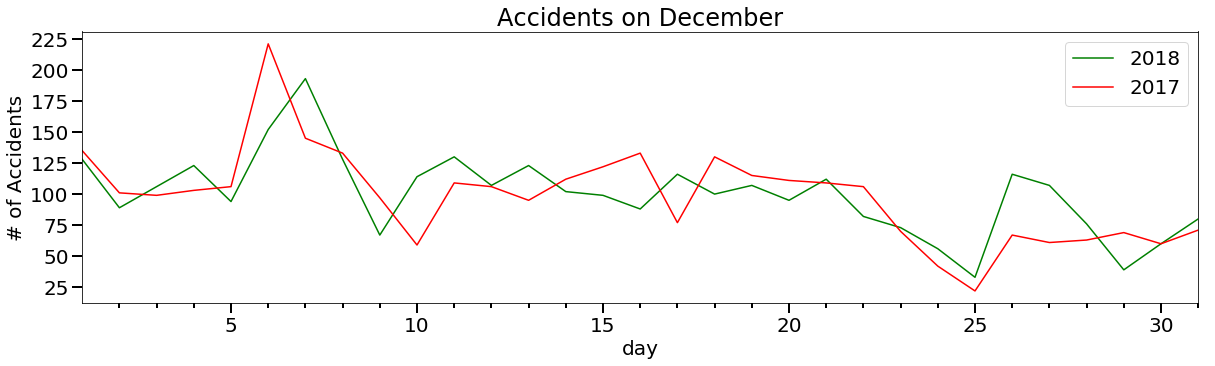

In [18]:
fig, ax=plt.subplots(figsize=(20, 5))
d_wssolschlmrks[(d_wssolschlmrks.year==2018)&(d_wssolschlmrks.month==12)].groupby(['day'])['Accident'].sum().plot(color='green', ax=ax, label='2018', legend=True, fontsize=20)
d_wssolschlmrks[(d_wssolschlmrks.year==2017)&(d_wssolschlmrks.month==12)].groupby(['day'])['Accident'].sum().plot(color='red', ax=ax, label='2017', legend=True, fontsize=20)
#d_wssolschlmrks[(d_wssolschlmrks.year==2019)&(d_wssolschlmrks.month==12)].groupby(['day'])['Accident'].sum().plot(ax=ax, label='2019', legend=True, fontsize=20)
#df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
ax.legend(fontsize=20)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.xlabel('day', fontsize=20)
plt.ylabel('# of Accidents', fontsize=20)
plt.title('Accidents on December', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Time_series_Dec.pdf', bbox_inches='tight')

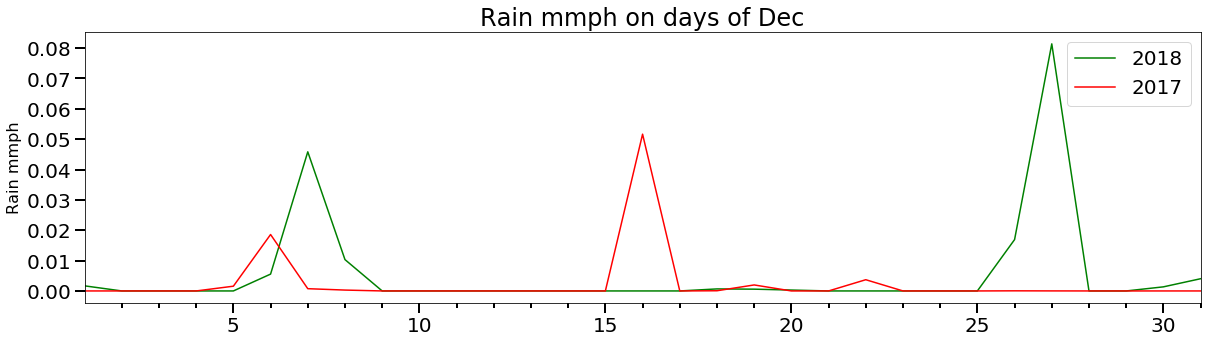

In [19]:
fig, ax=plt.subplots(figsize=(20, 5))
d_wssolschlmrks[(d_wssolschlmrks.year==2018)&(d_wssolschlmrks.month==12)].groupby(['day'])['pcpt_mmph'].mean().plot(color='green', ax=ax, label='2018', legend=True, fontsize=20)
d_wssolschlmrks[(d_wssolschlmrks.year==2017)&(d_wssolschlmrks.month==12)].groupby(['day'])['pcpt_mmph'].mean().plot(color='red', ax=ax, label='2017', legend=True, fontsize=20)
#d_wssolschlmrks[(d_wssolschlmrks.year==2019)&(d_wssolschlmrks.month==12)].groupby(['day'])['Accident'].sum().plot(ax=ax, label='2019', legend=True)
#df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.xlabel('')
plt.ylabel('Rain mmph', fontsize=16)
plt.legend(fontsize=20)
plt.title('Rain mmph on days of Dec', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Rain_on_Dec.pdf', bbox_inches='tight')

In [20]:

d_wssolschlmrks[(d_wssolschlmrks['Date']=='2017-12-6')&(d_wssolschlmrks['Location']=='(30.29011, -97.63516)')].groupby('hour')['temperature'].plot(ax=ax, label='2017-12-6', color='red',legend=True)
d_wssolschlmrks[(d_wssolschlmrks['Date']=='2018-12-7')&(d_wssolschlmrks['Location']=='(30.29011, -97.63516)')].groupby('hour')['temperature'].plot(ax=ax, label='2018-12-7', color='green',legend=True)
#d_wssolschlmrks[(d_wssolschlmrks.year==2019)&(d_wssolschlmrks.month==12)].groupby(['day'])['Accident'].sum().plot(ax=ax, label='2019', legend=True)
#df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)


hour
19    AxesSubplot(0.125,0.125;0.775x0.755)
Name: temperature, dtype: object

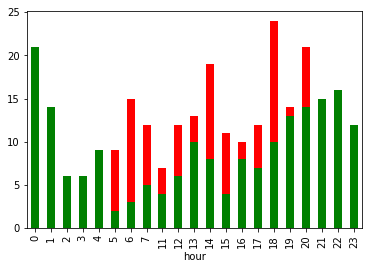

In [21]:
dpts1=d_wssolschlmrks[(d_wssolschlmrks['Date']=='2017-12-6')][['hour','temperature', 'Accident']].groupby('hour').sum()['Accident'].plot('bar', color='red')
dpts2=d_wssolschlmrks[(d_wssolschlmrks['Date']=='2018-12-7')][['hour','temperature', 'Accident']].groupby('hour').sum()['Accident'].plot('bar', color='green')

AttributeError: 'AxesSubplot' object has no attribute 'sort_values'

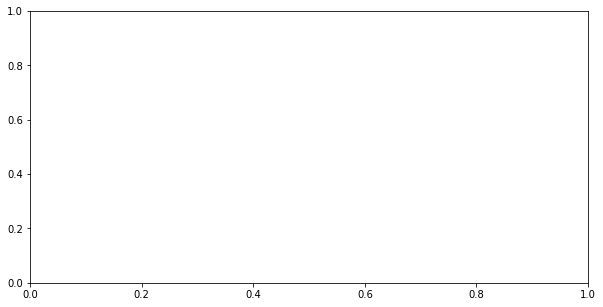

In [24]:
fig, ax=plt.subplots(figsize=(10, 5))
dps1=dpts1.sort_values('hour')
dps2=dpts2.sort_values('hour')
plt.scatter(dps1.hour, dps1.temperature, label='2017-12-6', color='blue', marker='s')
plt.scatter(dps2.hour, dps2.temperature, label='2018-12-7',color='red', marker='o')
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.legend(fontsize=20)
plt.title('Hourly temp on 2017Dec6 and 2018Dec7', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Hourly_onDate_temperature.pdf', bbox_inches='tight')

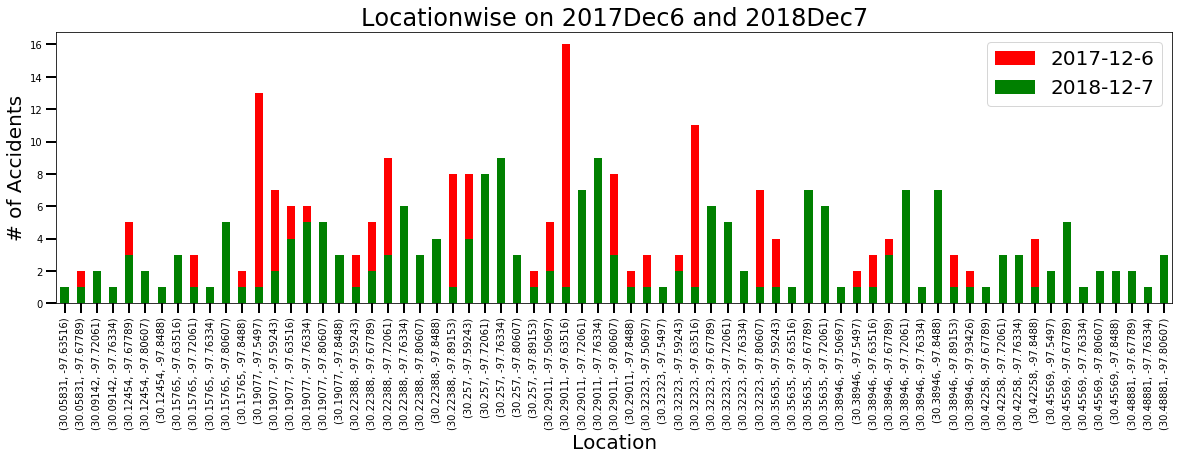

In [25]:
fig, ax=plt.subplots(figsize=(20, 5))
d_wssolschlmrks[(d_wssolschlmrks['Date']=='2017-12-6')].groupby(['Location'])['Accident'].sum().plot('bar',ax=ax, label='2017-12-6', color='red',legend=True)
d_wssolschlmrks[(d_wssolschlmrks['Date']=='2018-12-7')].groupby(['Location'])['Accident'].sum().plot('bar',ax=ax, label='2018-12-7', color='green',legend=True)
#d_wssolschlmrks[(d_wssolschlmrks.year==2019)&(d_wssolschlmrks.month==12)].groupby(['day'])['Accident'].sum().plot(ax=ax, label='2019', legend=True)
#df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
plt.xlabel('Location', fontsize=20)
plt.ylabel('# of Accidents', fontsize=20)
plt.legend(fontsize=20)
plt.title('Locationwise on 2017Dec6 and 2018Dec7', fontsize=24)
plt.tick_params(axis='both', which ='major', length=10, width=2)
plt.tick_params(axis='both', which ='minor', length=5, width=2)
plt.savefig('Locationwise_onDate_peak.pdf', bbox_inches='tight')

In [26]:
pd.get_dummies(d_wssolschlmrks['Issue Reported']).sum()#.plot.barh()

COLLISION                      9588
COLLISION WITH INJURY          3011
COLLISION/PRIVATE PROPERTY      519
COLLISN / FTSRA                   1
COLLISN/ LVNG SCN              2013
Crash Service                 22500
Crash Urgent                  30429
FLEET ACC/ FATAL                  1
FLEET ACC/ INJURY                17
TRAFFIC FATALITY                 19
VEHICLE FIRE                    322
dtype: int64

In [27]:
d_wssolschlmrks.Location.head()

0    (30.22388, -97.8488)
1    (30.22388, -97.8488)
2    (30.22388, -97.8488)
3    (30.22388, -97.8488)
4    (30.22388, -97.8488)
Name: Location, dtype: object

In [28]:
Austin_coord = (30.25, -97.7)
sf_map = folium.Map(location=Austin_coord, zoom_start=10.499)
#locs = d_wssolschlmrks[['Latitude', 'Longitude']]#.astype('float')#.as_matrix()
heatmap = plugins.HeatMap(d_wssolschlmrks[['Latitude', 'Longitude']], radius = 8)
sf_map.add_child(heatmap)
#sf_map.save('data.html')

In [29]:
newcol=d_wssolschlmrks.Location.str.split('(', expand=True)[1].str.split(',',expand=True)
newcol
d_wssolschlmrks['lat']=newcol[0].astype(float)
d_wssolschlmrks['lon']=newcol[1].str.split(')',expand=True)[0].astype(float)

In [30]:
Austin_COORDINATES = (30.35, -97.8)
sf_map = folium.Map(location=Austin_COORDINATES, zoom_start=10.4)
locs = d_wssolschlmrks[['lat', 'lon']].astype('float').as_matrix()
heatmap = folium.plugins.HeatMap(d_wssolschlmrks[['lat', 'lon']], radius = 15)
sf_map.add_child(heatmap)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
max(d_wssolschlmrks['Longitude']), min(d_wssolschlmrks['Longitude'])
max(d_wssolschlmrks['Latitude']), min(d_wssolschlmrks['Latitude'])

(30.6875, 30.025190000000002)

In [32]:
d_wssolschlmrks.groupby('Location').count();

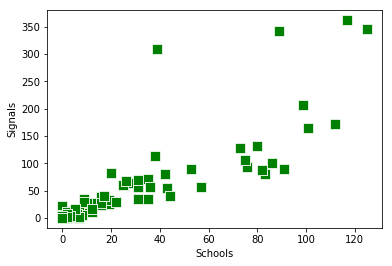

In [35]:
sns.scatterplot(data=d_wssolschlmrks, x='Schools', y='Signals',marker='s', color='green', s=100)

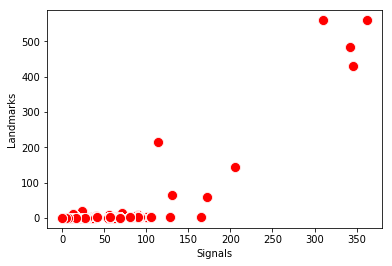

In [36]:
sns.scatterplot(data=d_wssolschlmrks, x='Signals', y='Landmarks', marker='o', s=100, color='red')

In [37]:
d_wssolschlmrks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68420 entries, 0 to 68419
Data columns (total 29 columns):
Unnamed: 0           68420 non-null int64
Time                 68420 non-null object
Date                 68420 non-null datetime64[ns]
year                 68420 non-null int64
month                68420 non-null int64
day                  68420 non-null int64
hour                 68420 non-null int64
DayOfWeek            68420 non-null int64
DayOfYear            68420 non-null int64
Holiday              68420 non-null object
Latitude             68420 non-null float64
Longitude            68420 non-null float64
Location             68420 non-null object
Weather              68420 non-null object
pcpt_mmph            68420 non-null float64
visibility           68420 non-null float64
humidity             68396 non-null float64
windSpeed            68389 non-null float64
Signals              68420 non-null int64
Schools              68420 non-null int64
Landmarks            68420

In [38]:
ac_levels={'Issue Reported': {'Crash Urgent':'Crash','Crash Service':'Crash','COLLISION/PRIVATE PROPERTY':'Collision', 'COLLISION':'Collision', 'COLLISN/ LVNG SCN':'Collision', 'COLLISION WITH INJURY':'Injury/Fatal','FLEET ACC/ INJURY':'Injury/Fatal', 'VEHICLE FIRE':'Injury/Fatal', 'TRAFFIC FATALITY':'Injury/Fatal','COLLISN / FTSRA':'Collision', 'FLEET ACC/ FATAL':'Injury/Fatal'}}

In [39]:
d_wssolschlmrks.replace(ac_levels, inplace=True)

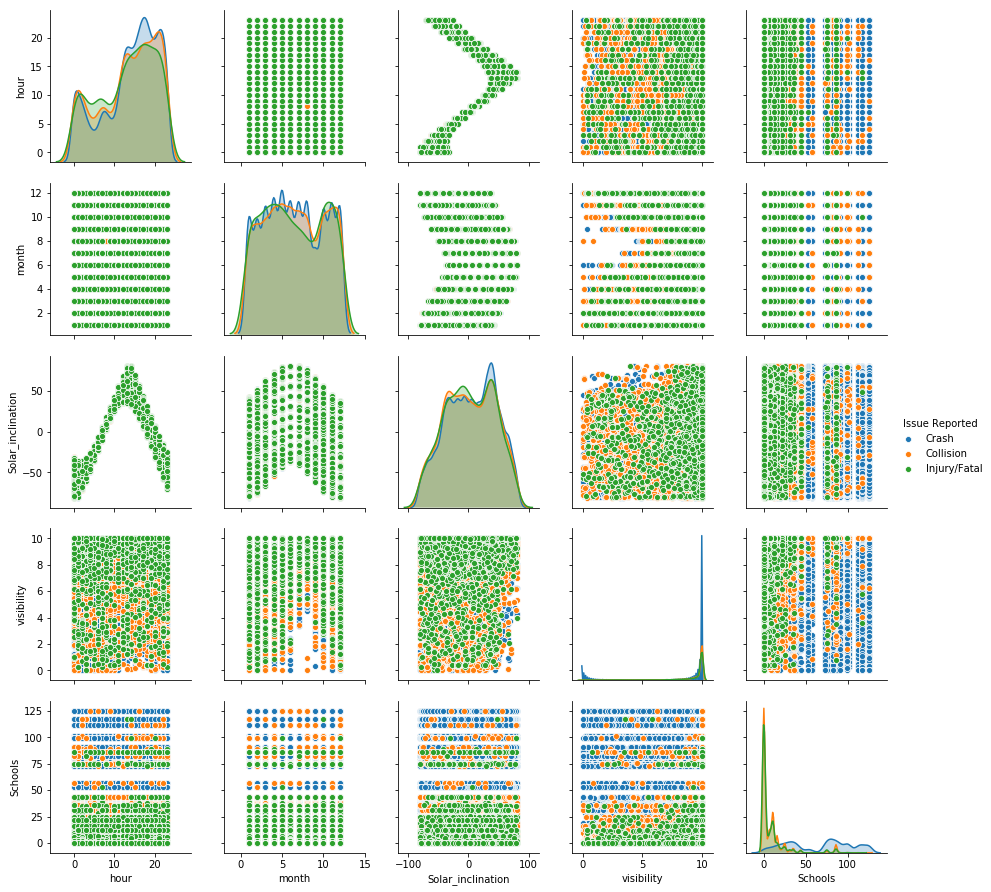

In [41]:
sns.pairplot(data=d_wssolschlmrks[['hour','month','Solar_inclination', 'Issue Reported', 'visibility', 'Schools']], hue='Issue Reported')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.savefig('PairPlot1.png', bbox_inches='tight')

In [33]:
sns.pairplot(data=d_wssolschlmrks[['windSpeed', 'Issue Reported', 'humidity', 'pcpt_mmph']], hue='Issue Reported')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.savefig('PairPlot2.png', bbox_inches='tight')

In [34]:
df_hour_list=[]
sf_map1 = folium.Map(location=Austin_coord, zoom_start=10.499)
for hour in d_wssolschlmrks.hour.sort_values().unique():
    df_hour_list.append(d_wssolschlmrks.loc[d_wssolschlmrks.hour==hour,['lat', 'lon', 'Accident']].groupby(['lat','lon']).sum().reset_index().values.tolist())
plugins.HeatMapWithTime(df_hour_list, radius=8, gradient={0.2: 'blue', 0.6: 'green', 0.8: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=1, use_local_extrema=True).add_to(sf_map1)